In [1]:
# Import Dependencies
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Conv2D, Dropout, MaxPool2D, Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\ad1026858\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Import Dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
# Normalize Features
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [4]:
num_classes = len(np.unique(y_train))

In [5]:
# One Hot Encoding Labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
# Train Validation Split
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=101)

In [8]:
len(X_train), len(y_train)

(40000, 40000)

In [9]:
len(X_val), len(y_val)

(10000, 10000)

In [10]:
X_train.shape, y_train.shape

((40000, 32, 32, 3), (40000, 10))

In [11]:
X_val.shape, y_val.shape

((10000, 32, 32, 3), (10000, 10))

In [12]:
# Make the CNN Model

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='elu', input_shape=(X_train.shape[1:])))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=2))
#model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='elu'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='elu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
__________

In [13]:
# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [14]:
from keras.callbacks import ModelCheckpoint   

checkpoint = ModelCheckpoint(filepath='./cifar_cnn.hdf5', verbose=1 ,save_best_only=True)

hist = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_val, y_val), callbacks=[checkpoint], verbose=2, shuffle=True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
 - 32s - loss: 1.5760 - acc: 0.4370 - val_loss: 1.2660 - val_acc: 0.5556

Epoch 00001: val_loss improved from inf to 1.26596, saving model to ./cifar_cnn.hdf5
Epoch 2/20
 - 29s - loss: 1.2897 - acc: 0.5423 - val_loss: 1.3608 - val_acc: 0.5286

Epoch 00002: val_loss did not improve
Epoch 3/20
 - 31s - loss: 1.2074 - acc: 0.5769 - val_loss: 1.0950 - val_acc: 0.6175

Epoch 00003: val_loss improved from 1.26596 to 1.09500, saving model to ./cifar_cnn.hdf5
Epoch 4/20
 - 31s - loss: 1.1545 - acc: 0.5932 - val_loss: 1.0930 - val_acc: 0.6158

Epoch 00004: val_loss improved from 1.09500 to 1.09299, saving model to ./cifar_cnn.hdf5
Epoch 5/20
 - 32s - loss: 1.1159 - acc: 0.6095 - val_loss: 1.0487 - val_acc: 0.6290

Epoch 00005: val_loss improved from 1.09299 to 1.04874, saving model to ./cifar_cnn.hdf5
Epoch 6/20
 - 32s - loss: 1.0843 - acc: 0.6206 - val_loss: 0.9955 - val_acc: 0.6511

Epoch 00006: val_loss improved from 1.04874 to 0.9

In [15]:
hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

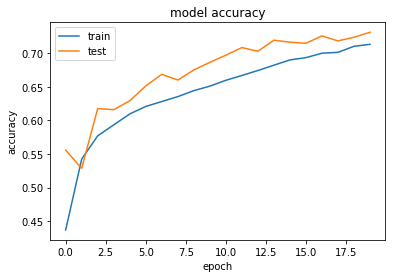

In [16]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

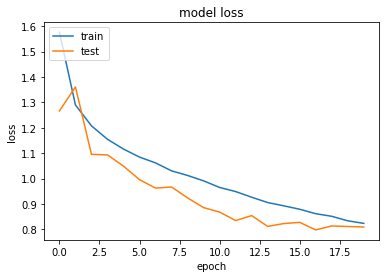

In [17]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [18]:
# Test Accuracy
score = model.evaluate(X_test, y_test, verbose=1)
print('\n', 'Test accuracy: {} %'.format(score[1]*100))

10000/10000 [==============================] - 3s 273us/step

 Test accuracy: 72.13000000000001 %


In [19]:
# get predictions on the test set
y_hat = model.predict(X_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

### Plot of Predicted Label vs Original Label

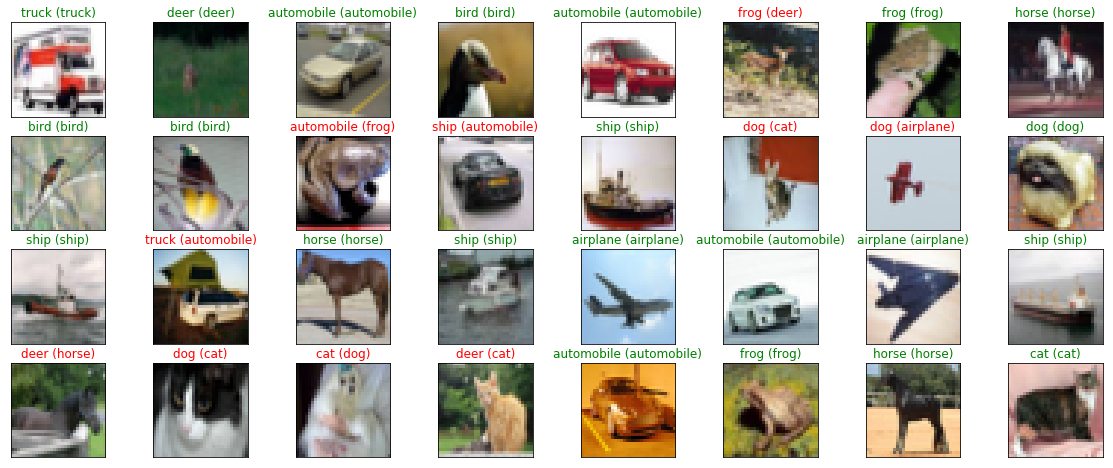

In [20]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))